In [3]:
from skimage import io, color, measure
from skimage.filters import try_all_threshold, threshold_triangle, threshold_yen
from skimage.measure import label, regionprops
from skimage.color import label2rgb

import numpy as np
import matplotlib.pyplot as plt

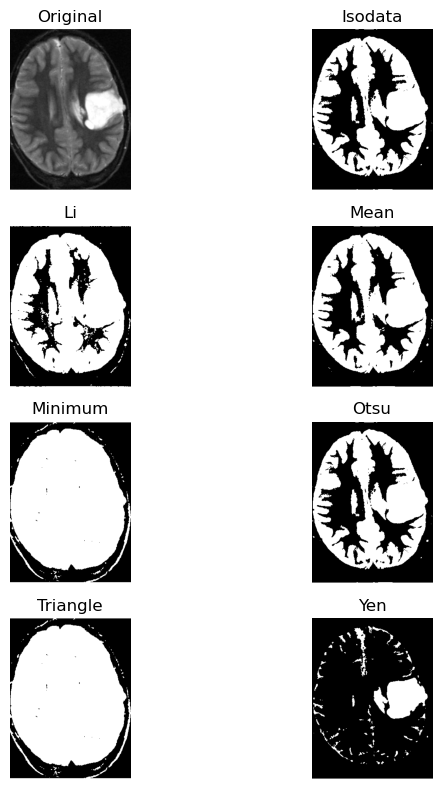

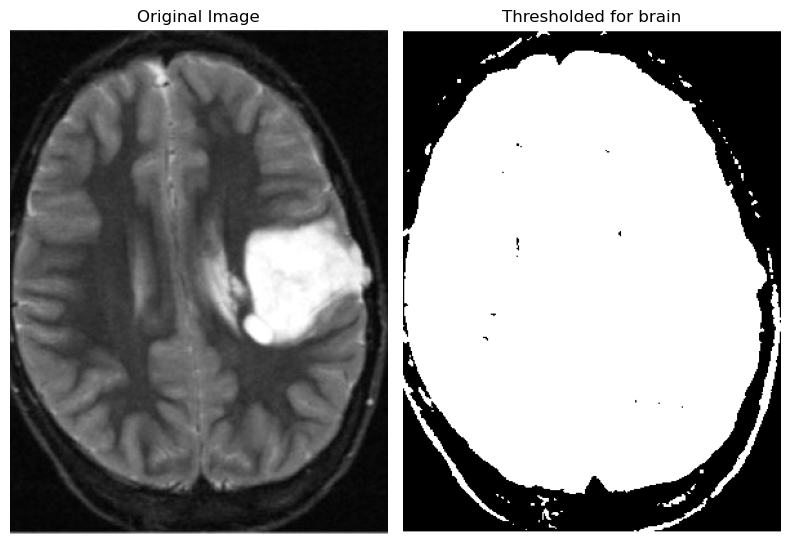

In [4]:
# Zadanie 1 - segmentacja poprzez progowanie

# Polecenie 1
image = io.imread('brain_tumor.png', as_gray=True)

fig, ax = fig, ax = try_all_threshold(image, figsize=(8, 8), verbose=False)
plt.show()

threshold_value = threshold_triangle(image)
binary_image = image > threshold_value
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_image, cmap=plt.cm.gray)
ax[1].set_title('Thresholded for brain')
ax[1].axis('off')

plt.tight_layout()
plt.show()

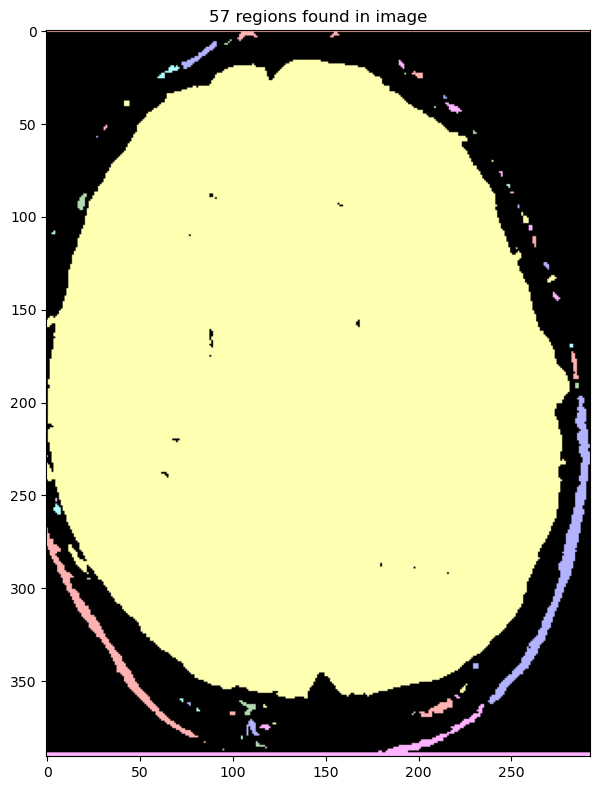

In [5]:
# Polecenie 2
labeled_image = label(binary_image)

num_segments = labeled_image.max()

segmented_image = label2rgb(labeled_image, image=binary_image, bg_label=0, colors=['red', 'green', 'blue', 'yellow', 'magenta', 'cyan'])

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(segmented_image)
ax.set_title(f'{num_segments} regions found in image')

plt.tight_layout()
plt.show()

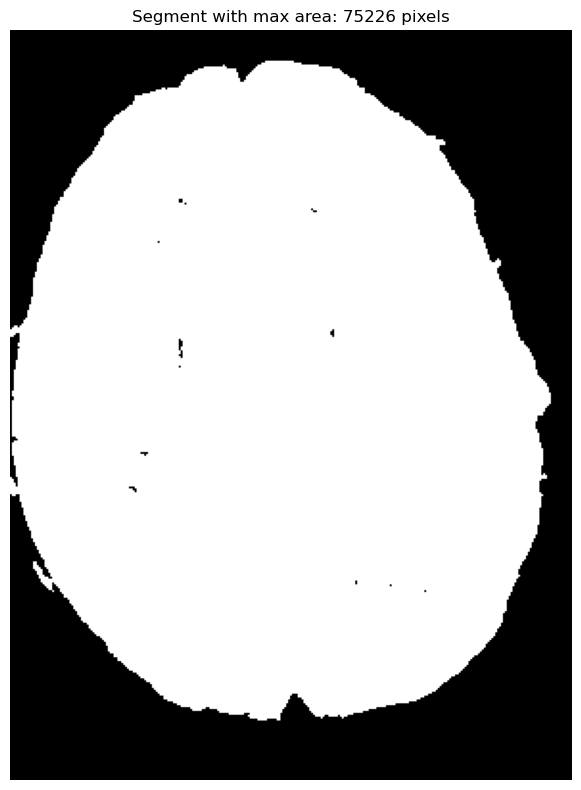

In [8]:
# Polecenie 3

regions = regionprops(labeled_image)
max_area_region = max(regions, key=lambda r: r.area)
max_area = int(max_area_region.area)

minr, minc, maxr, maxc = max_area_region.bbox

overlay_image_brain = np.zeros_like(image)
overlay_image_brain[minr:maxr, minc:maxc] = max_area_region.image

# Display the segment with the maximum area
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(overlay_image_brain, cmap=plt.cm.gray)
ax.set_title(f'Segment with max area: {max_area} pixels')
ax.axis('off')

plt.tight_layout()
plt.show()

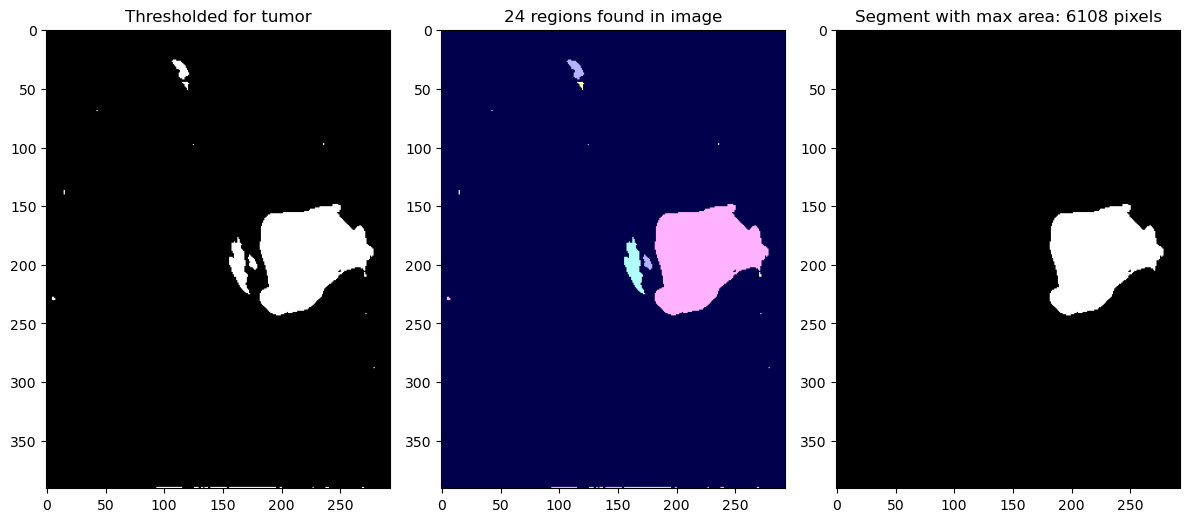

In [19]:
# Polecenie 4

# 0.4887408088235294
# threshold_value = threshold_yen(image)
# Assuming `image` is already defined
threshold_value = 0.69
binary_image = image > threshold_value
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ax = axes.ravel()

labeled_image = label(binary_image)
num_segments = labeled_image.max()

segmented_image = label2rgb(labeled_image, image=binary_image, bg_label=0, bg_color=(0, 0, 1), colors=['blue', 'yellow', 'magenta', 'cyan'])

regions = regionprops(labeled_image)
max_area_region = max(regions, key=lambda r: r.area)
max_area = int(max_area_region.area)

minr, minc, maxr, maxc = max_area_region.bbox

overlay_image_tumor = np.zeros_like(image)
overlay_image_tumor[minr:maxr, minc:maxc] = max_area_region.image

ax[0].imshow(binary_image, cmap=plt.cm.gray)
ax[0].set_title('Thresholded for tumor')

ax[1].imshow(segmented_image)
ax[1].set_title(f'{num_segments} regions found in image')

ax[2].imshow(overlay_image_tumor, cmap=plt.cm.gray)
ax[2].set_title(f'Segment with max area: {max_area} pixels')

plt.tight_layout()
plt.show()

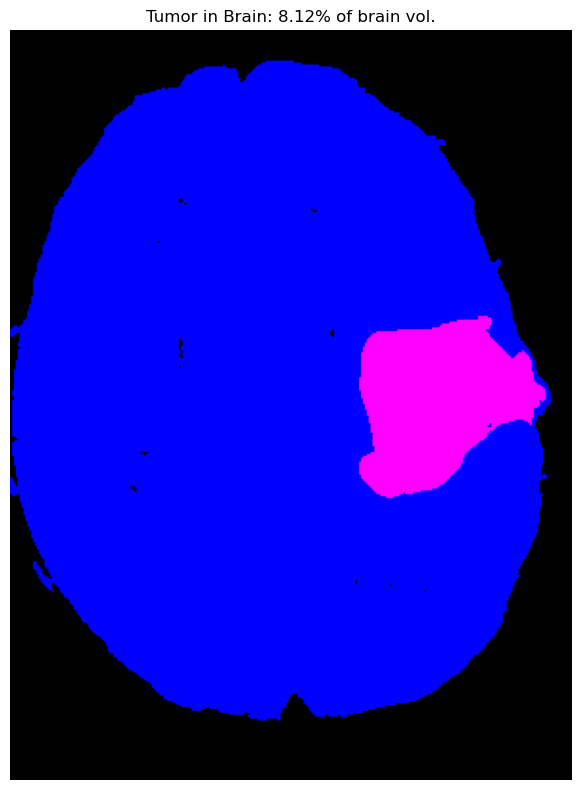

In [145]:
# Polecenie 5
# Combine the brain and tumor overlays
combined_overlay = np.zeros((*image.shape, 3), dtype=np.uint8)
combined_overlay[overlay_image_brain > 0] = [0, 0, 255]  # Blue for brain
combined_overlay[overlay_image_tumor > 0] = [255, 0, 255]  # Pink for tumor

# Calculate the percentage of the tumor in the brain
tumor_area = np.sum(overlay_image_tumor > 0)
brain_area = np.sum(overlay_image_brain > 0)
percentage_tumor_in_brain = (tumor_area / brain_area) * 100

# Display the combined overlay
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(combined_overlay)
ax.set_title(f'Tumor in Brain: {percentage_tumor_in_brain:.2f}% of brain vol.')
ax.axis('off')

plt.tight_layout()
plt.show()

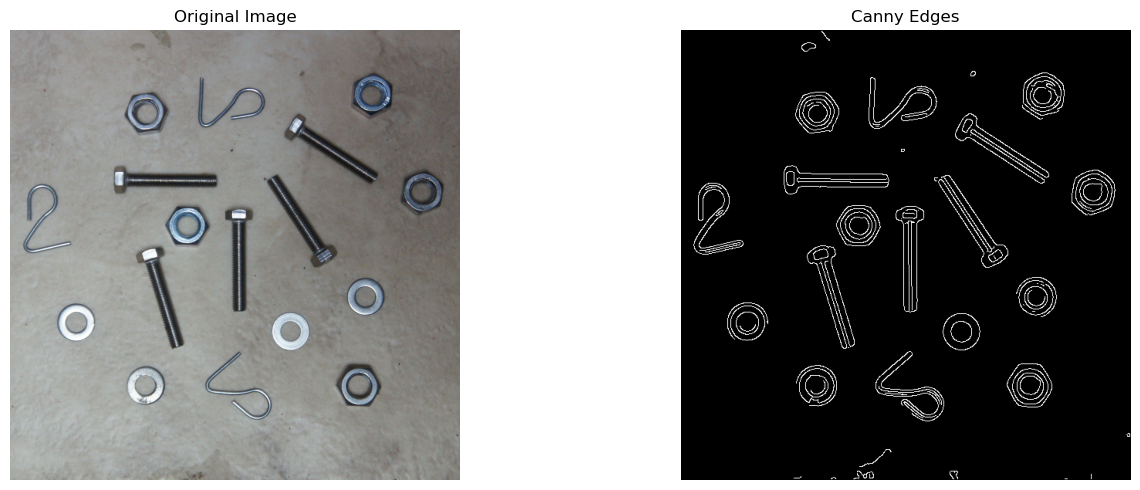

In [146]:
# Zadanie 2 - segmentacja poprzez detekcję krawędzi.

# Polecenie 1
from skimage import io, color, filters, feature, transform, morphology
import matplotlib.pyplot as plt

# Load the image
image = io.imread('bolts.jpg')

if image.ndim == 2:
    image = color.gray2rgb(image)

# Reduce the resolution of the image
image_resized = transform.rescale(image, 0.21, anti_aliasing=True, channel_axis=-1)

sigma_value = 1

gray_image = color.rgb2gray(image_resized)

gaussian_image = filters.gaussian(gray_image, sigma=sigma_value)

edges = feature.canny(gaussian_image, sigma=sigma_value)

# Display the results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(edges, cmap=plt.cm.gray)
ax[1].set_title('Canny Edges')
ax[1].axis('off')

plt.tight_layout()
plt.show()

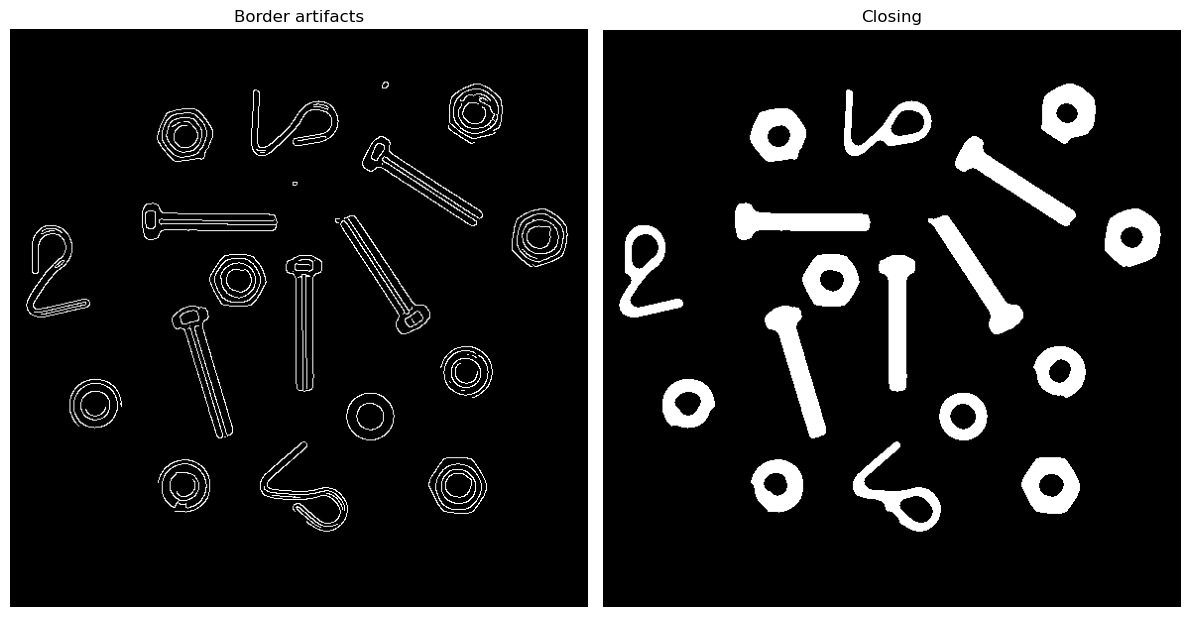

In [147]:
# Polecenie 2
border_size = 10

edges[:50, :] = 0 # top
edges[-50:, :] = 0 # bottom
edges[:, :10] = 0 # left
edges[:, -10:] = 0 # right

selem = morphology.disk(7)
closed_edges = morphology.binary_closing(edges, selem)

cleaned_image = morphology.remove_small_objects(closed_edges, min_size=50)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(edges, cmap=plt.cm.gray)
ax[0].set_title('Border artifacts')
ax[0].axis('off')

ax[1].imshow(cleaned_image, cmap=plt.cm.gray)
ax[1].set_title('Closing')
ax[1].axis('off')

plt.tight_layout()
plt.show()

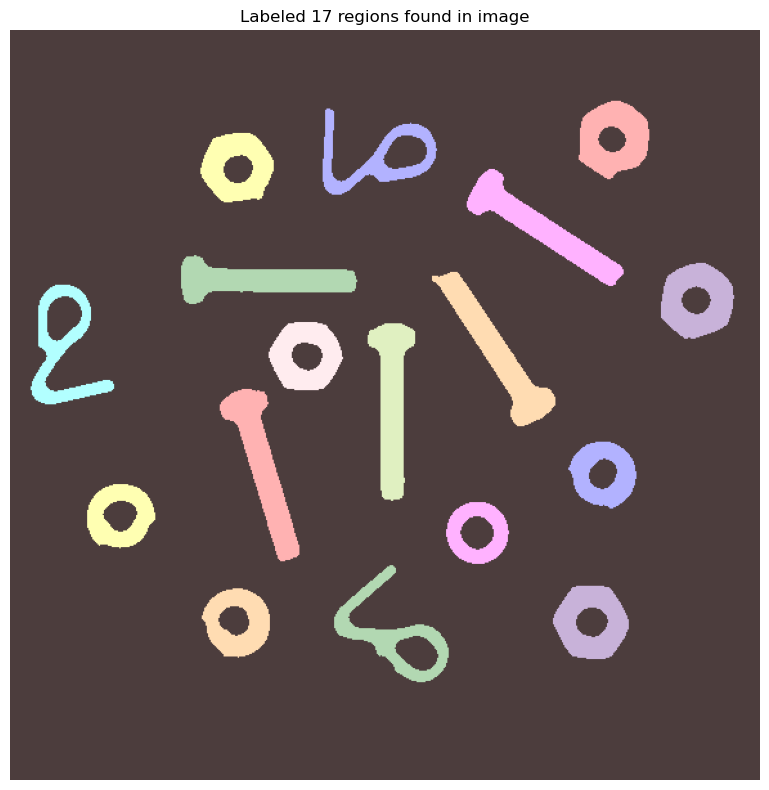

In [148]:
# Polecenie 3
labeled_image = label(cleaned_image)

num_segments = labeled_image.max()

segmented_image = label2rgb(labeled_image, image=cleaned_image, bg_label=0, bg_color=(1, 0.8, 0.8))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(segmented_image)
ax.set_title(f'Labeled {num_segments} regions found in image')
ax.axis('off')

plt.tight_layout()
plt.show()

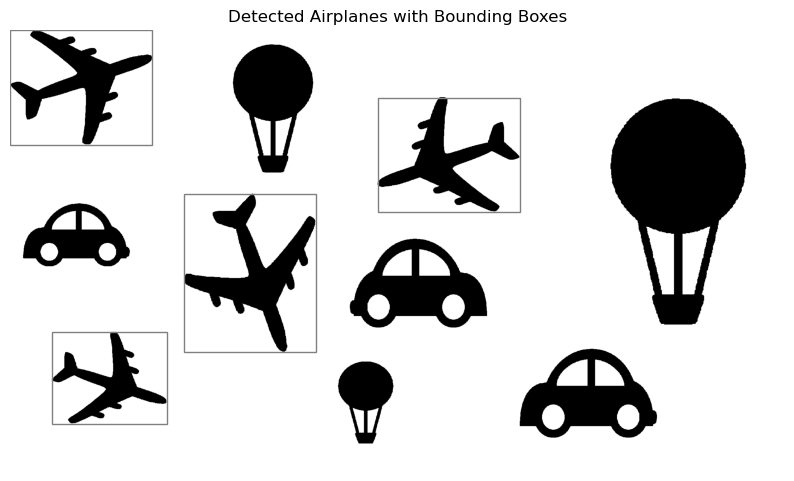

In [190]:
# Zadanie 3

image = io.imread('planes.png', as_gray=True)

# Apply a threshold to create a binary image
thresh = filters.threshold_otsu(image)
binary_image = image < thresh 

# Label connected regions
labeled_image = label(binary_image)

# Identify properties of labeled regions
regions = regionprops(labeled_image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(color.gray2rgb(image)) 

for region in regions:
    if  region.euler_number == 1:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             edgecolor='gray', linewidth=1, fill=False)
        ax.add_patch(rect)

# Display the results
plt.axis('off')
plt.title("Detected Airplanes with Bounding Boxes")
plt.show()